In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno


In [4]:
df = pd.read_csv(r"..\data\AgeDataset-V1.csv")

In [5]:
df.head(10)

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0
5,Q260,Jean-François Champollion,French classical scholar,Male,Kingdom of France; First French Empire,Egyptologist,1790,1832.0,natural causes,42.0
6,Q272,Paul Morand,French writer,Male,France,Artist,1888,1976.0,NaN,88.0
7,Q296,Claude Monet,French impressionist painter (1840-1926),Male,France,Artist,1840,1926.0,natural causes,86.0
8,Q297,Diego Velázquez,Spanish painter (1599-1660),Male,Spain,Artist,1599,1660.0,NaN,61.0
9,Q301,El Greco,"Greek painter, sculptor and architect",Male,Spain; Republic of Venice,Artist,1541,1614.0,NaN,73.0


In [6]:
df.pop("Id")
df.pop("Short description")
#df.pop("Age of death")
df.head()

,Name,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,George Washington,Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
1,Douglas Adams,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0
2,Abraham Lincoln,Male,United States of America,Politician,1809,1865.0,homicide,56.0
3,Wolfgang Amadeus Mozart,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0
4,Ludwig van Beethoven,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0


<AxesSubplot:>

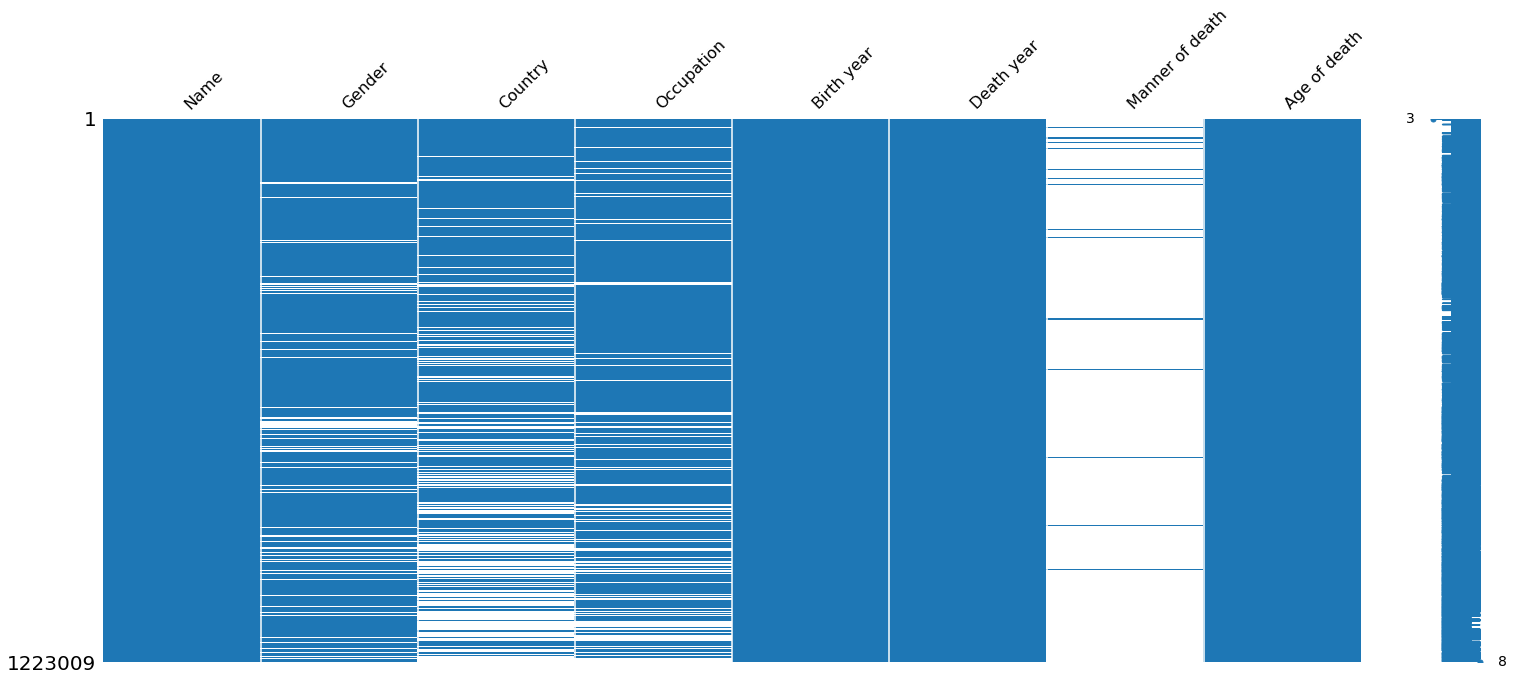

In [7]:
msno.matrix(df,color=(.12, .47, .71))

In [8]:
# CONTO I NULL
df.isnull().sum()

Name                     0
Gender              133646
Country             335509
Occupation          206914
Birth year               0
Death year               1
Manner of death    1169406
Age of death             1
dtype: int64

In [9]:
# RIMUOVO I GENDER NULL
df = df[df['Gender'].notna()]
# RIMUOVO I DEATH YEAR E AGE DEATH NULL
df = df[df['Death year'].notna()]
# RIEMPIO GLI OCCUPATION NaN CON 'Unknown'
#df['Occupation'] = df['Occupation'].fillna('Unknown')
df = df[df['Occupation'].notna()]
# RIEMPIO I MANNER OF DEATH NaN CON 'Unknown'
df['Manner of death'] = df['Manner of death'].fillna('Unknown')
#df = df[df['Manner of death'].notna()]
# RIEMPIO I COUNTRY NaN CON 'Unknown'
#df['Country'] = df['Country'].fillna('Unknown')
df = df[df['Country'].notna()]

# CONTO I NULL
df.isnull().sum()

Name               0
Gender             0
Country            0
Occupation         0
Birth year         0
Death year         0
Manner of death    0
Age of death       0
dtype: int64

In [10]:
df["Gender"].value_counts()

Male                                              662117
Female                                             73541
Transgender Female                                    57
Transgender Male                                      30
Eunuch; Male                                          13
Intersex                                               7
Female; Male                                           5
Transgender Male; Female                               3
Non-Binary                                             2
Female; Female                                         1
Transgender Female; Intersex                           1
Eunuch                                                 1
Transgender Male; Male                                 1
Transgender Female; Female                             1
Intersex; Transgender Male                             1
Transgender Female; Male                               1
Intersex; Male                                         1
Transgender Person; Intersex; T

In [11]:
# SOSTITUISCO I GENDER DIVERSI DA MASCHIO E FEMMINA CON 'ALTRO'
df['Gender'] = df['Gender'].replace({'Transgender Female': 'Other', 'Transgender Male': 'Other', 'Eunuch; Male': 'Other', 'Female; Male': 'Other', 'Intersex': 'Other', 'Transgender Male; Female': 'Other', 'Eunuch': 'Other', 'Intersex; Male': 'Other', 'Non-Binary': 'Other', 'Transgender Female; Male': 'Other',
                                    'Intersex; Female': 'Other', 'Transgender Person; Intersex; Transgender Male': 'Other', 'Transgender Male; Male': 'Other', 'Non-Binary; Intersex': 'Other', 'Intersex; Transgender Male': 'Other', 'Female; Female': 'Other', 'Transgender Female; Intersex': 'Other', 'Transgender Female; Female': 'Other'})

In [12]:
df["Gender"].value_counts()

Male      662117
Female     73541
Other        127
Name: Gender, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735785 entries, 0 to 1223008
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Name             735785 non-null  object 
 1   Gender           735785 non-null  object 
 2   Country          735785 non-null  object 
 3   Occupation       735785 non-null  object 
 4   Birth year       735785 non-null  int64  
 5   Death year       735785 non-null  float64
 6   Manner of death  735785 non-null  object 
 7   Age of death     735785 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 50.5+ MB


In [14]:
# DEATH YEAR E AGE OF DEATH AD INT
df = df.astype({'Death year':'int64'})
df = df.astype({'Name':'string','Gender':'string','Country':'string','Occupation':'string','Manner of death':'string'})

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735785 entries, 0 to 1223008
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Name             735785 non-null  string 
 1   Gender           735785 non-null  string 
 2   Country          735785 non-null  string 
 3   Occupation       735785 non-null  string 
 4   Birth year       735785 non-null  int64  
 5   Death year       735785 non-null  int64  
 6   Manner of death  735785 non-null  string 
 7   Age of death     735785 non-null  float64
dtypes: float64(1), int64(2), string(5)
memory usage: 50.5 MB


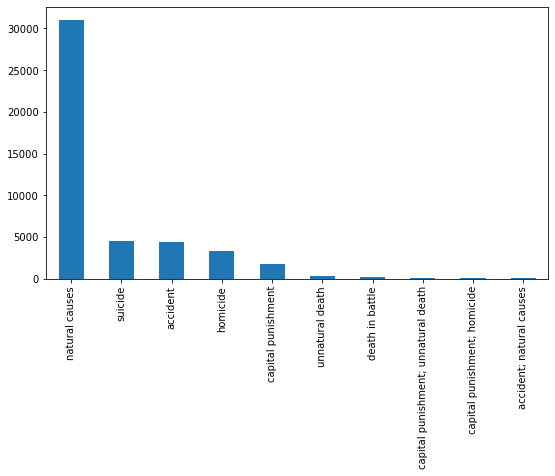

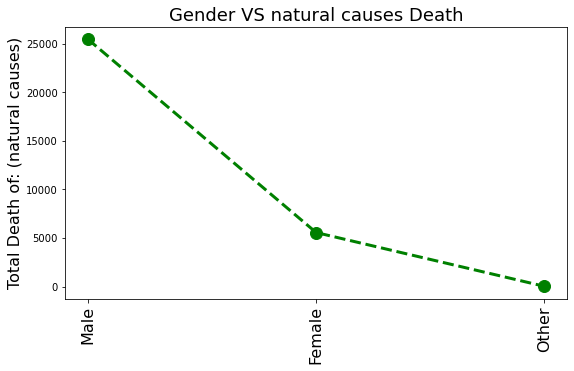

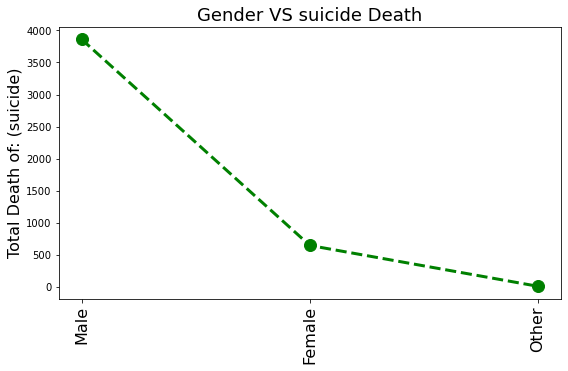

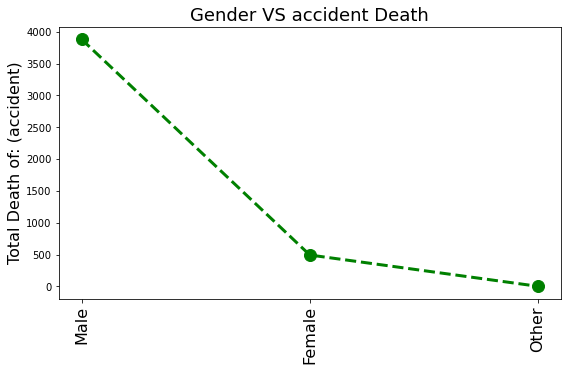

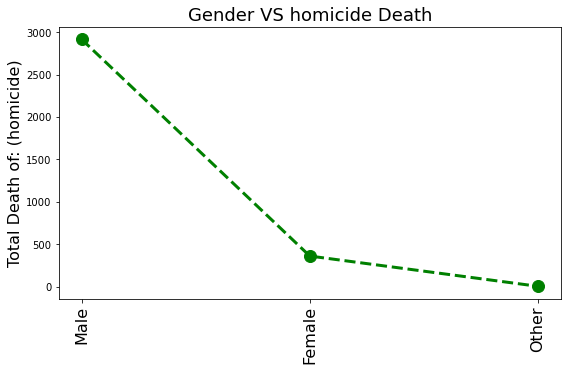

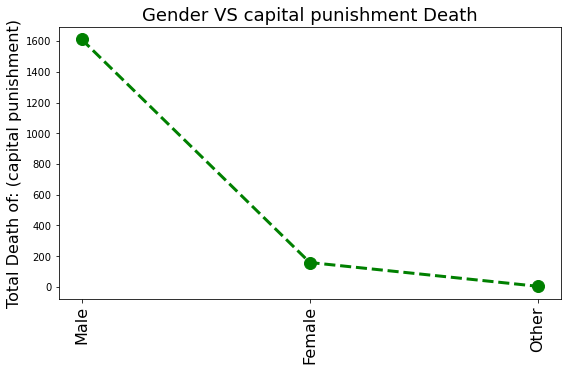

In [16]:
# SESSO PER TIPO DI MORTE
colum_txt=df['Manner of death'].value_counts()[1:].nlargest(5)
list_arr=colum_txt.index.tolist()
# ESCLUDO LA PRIMA RIGHA PERCHE SONO TUTTI Unknown
df['Manner of death'].value_counts()[1:].nlargest(10).plot(kind='bar',figsize=(9,5))

for i in list_arr:
    count_dat=df[df['Manner of death']==i]
    plt.figure(figsize=(9,5))
    plt.plot(count_dat['Gender'].value_counts(),color='green', marker='o', linestyle='dashed',linewidth=3, markersize=12)
    plt.title('Gender VS '+i+' Death',fontsize=18)
    plt.xticks(rotation=90,fontsize=16)
    plt.ylabel('Total Death of: ('+i+')',fontsize=16)
    plt.show()

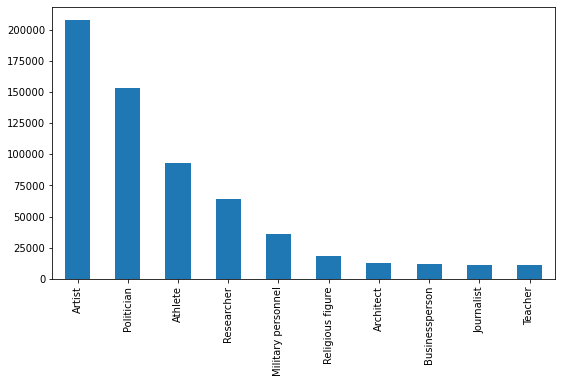

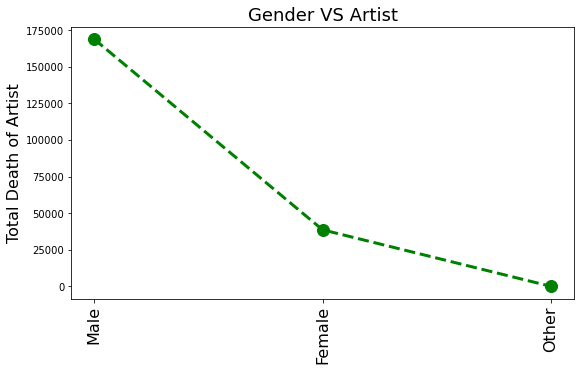

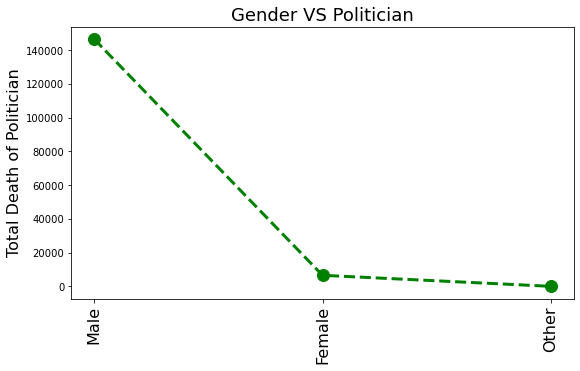

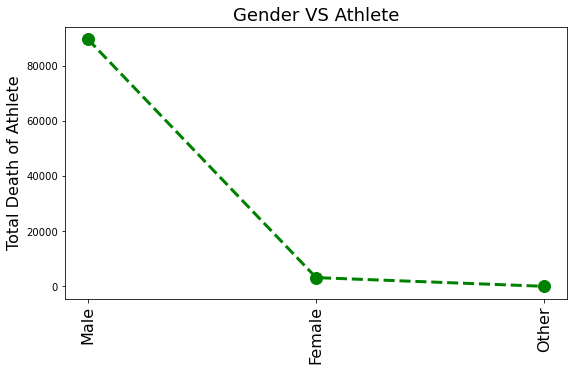

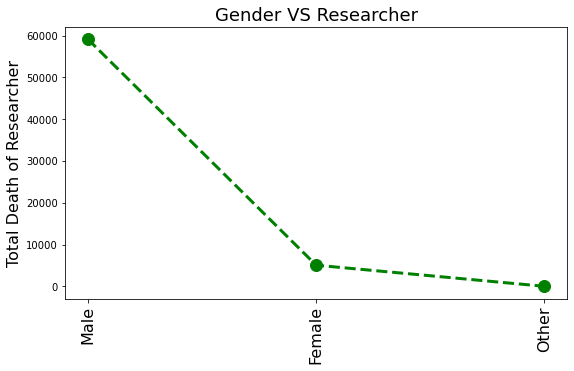

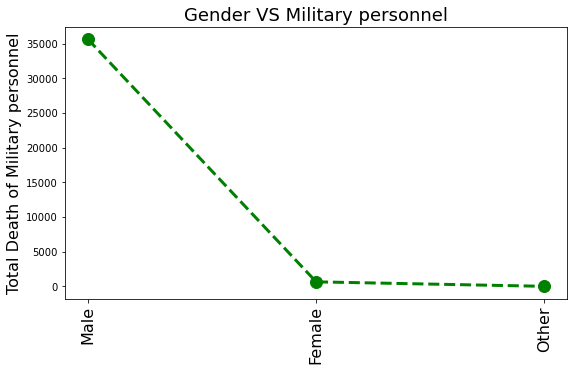

In [17]:
# LAVORO PER TIPO DI MORTE
colum_txt=df['Occupation'].value_counts().nlargest(5)
list_arr=colum_txt.index.tolist()
df['Occupation'].value_counts().nlargest(10).plot(kind='bar',figsize=(9,5))

for i in list_arr:
    count_dat=df[df['Occupation']==i]
    plt.figure(figsize=(9,5))
    plt.plot(count_dat['Gender'].value_counts(),color='green', marker='o', linestyle='dashed',linewidth=3, markersize=12)
    plt.title('Gender VS '+i,fontsize=18)
    plt.xticks(rotation=90,fontsize=16)
    plt.ylabel('Total Death of '+i,fontsize=16)
    plt.show()

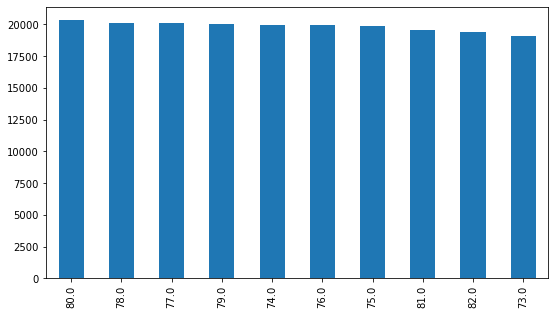

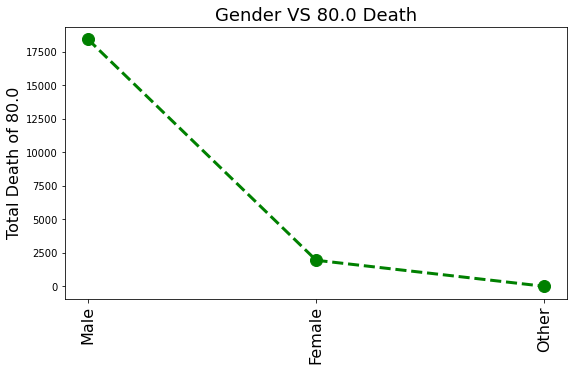

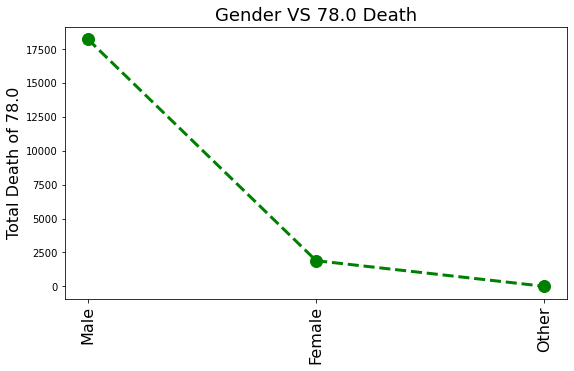

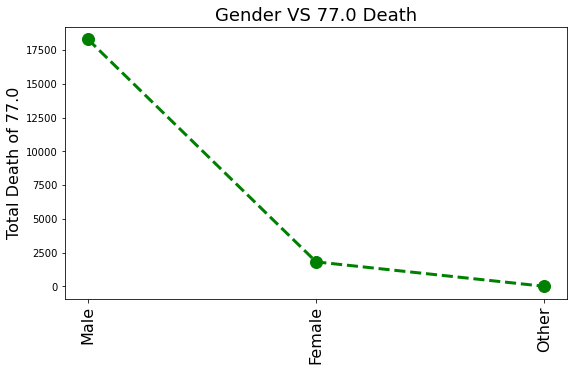

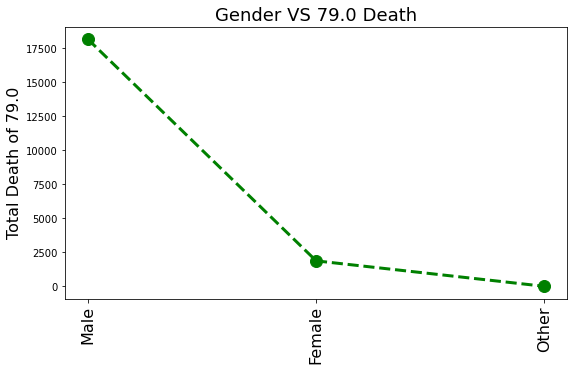

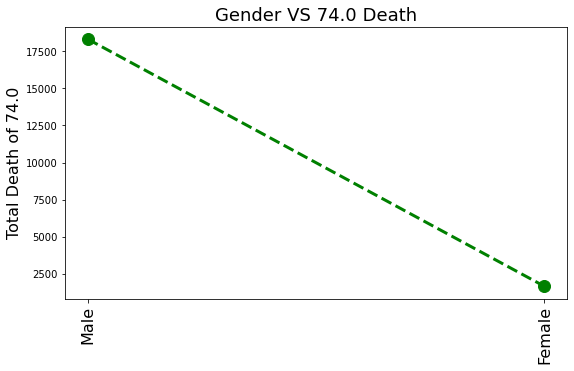

In [18]:
# SESSO PER ETA' DI MORTE
colum_txt=df['Age of death'].value_counts().nlargest(5)
list_arr1=colum_txt.index.tolist()
df['Age of death'].value_counts().nlargest(10).plot(kind='bar',figsize=(9,5))

for i in list_arr1:
    count_dat=df[df['Age of death']==i]
    plt.figure(figsize=(9,5))
    plt.plot(count_dat['Gender'].value_counts(),color='green', marker='o', linestyle='dashed',linewidth=3, markersize=12)
    plt.title('Gender VS '+str(i)+' Death',fontsize=18)
    plt.xticks(rotation=90,fontsize=16)
    plt.ylabel('Total Death of '+str(i),fontsize=16)
    plt.show()

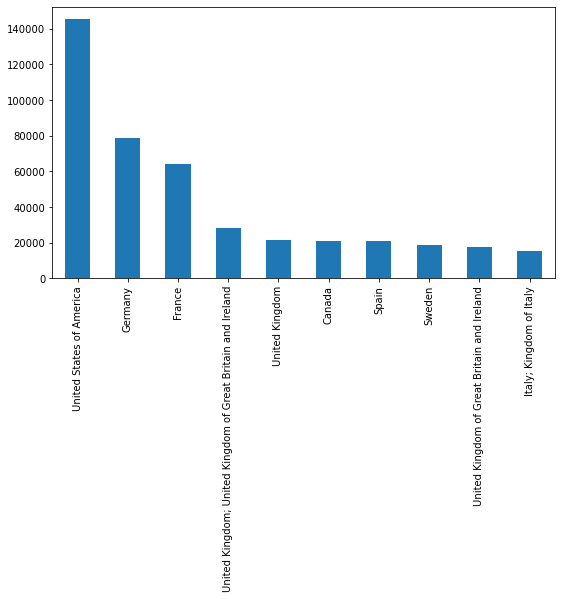

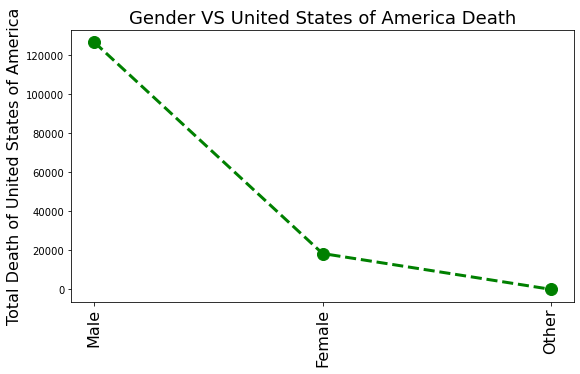

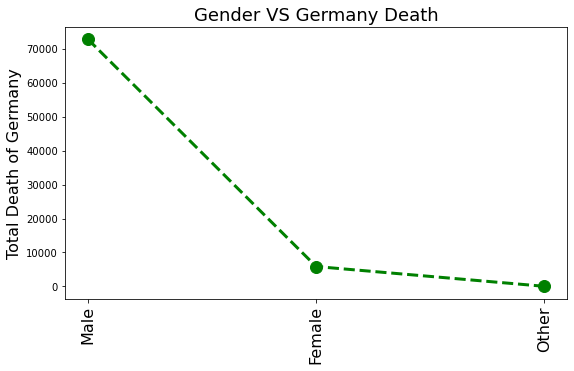

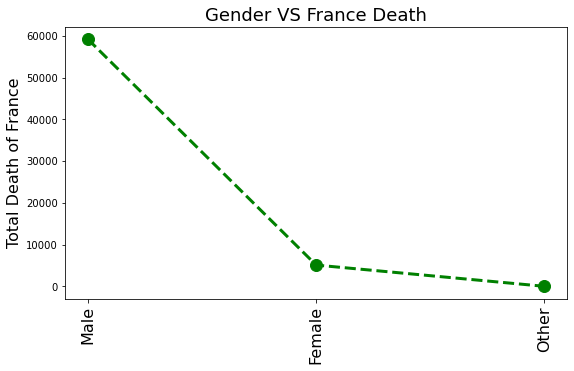

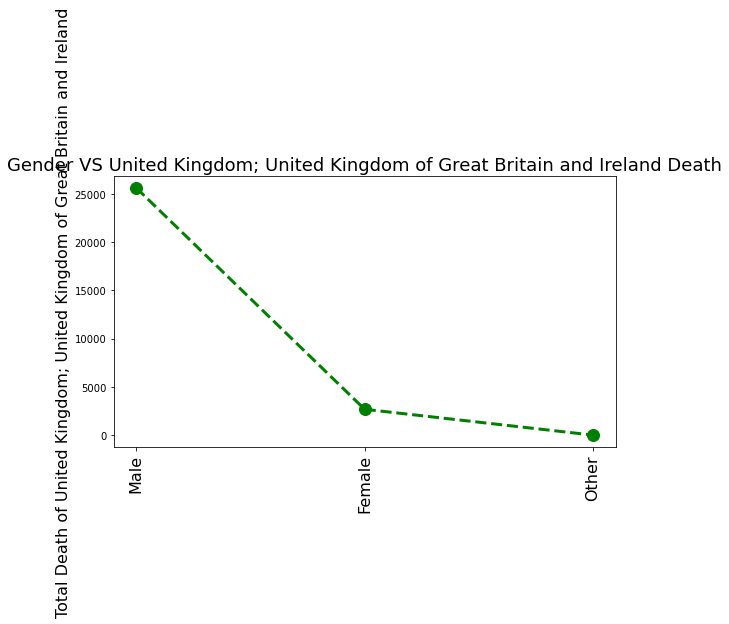

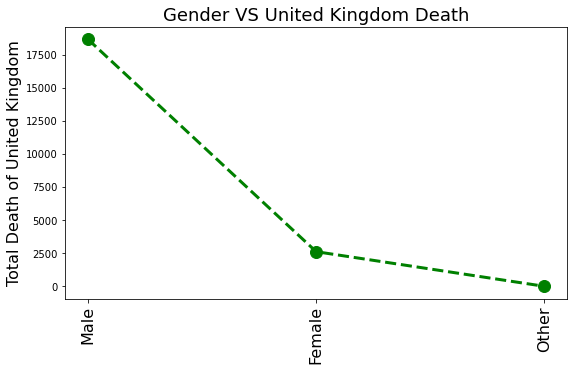

In [19]:
# SESSO PER NAZIONE
df['Country'].value_counts().nlargest(10).plot(kind='bar',figsize=(9,5))
colum_txt=df['Country'].value_counts().nlargest(5)
list_arr1=colum_txt.index.tolist()

for i in list_arr1:
    count_dat=df[df['Country']==i]
    plt.figure(figsize=(9,5))
    plt.plot(count_dat['Gender'].value_counts(),color='green', marker='o', linestyle='dashed',linewidth=3, markersize=12)
    plt.title('Gender VS '+i+' Death',fontsize=18)
    plt.xticks(rotation=90,fontsize=16)
    plt.ylabel('Total Death of '+i ,fontsize=16)
    plt.show()


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735785 entries, 0 to 1223008
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Name             735785 non-null  string 
 1   Gender           735785 non-null  string 
 2   Country          735785 non-null  string 
 3   Occupation       735785 non-null  string 
 4   Birth year       735785 non-null  int64  
 5   Death year       735785 non-null  int64  
 6   Manner of death  735785 non-null  string 
 7   Age of death     735785 non-null  float64
dtypes: float64(1), int64(2), string(5)
memory usage: 50.5 MB


In [21]:
df.head()

,Name,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,George Washington,Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799,natural causes,67.0
1,Douglas Adams,Male,United Kingdom,Artist,1952,2001,natural causes,49.0
2,Abraham Lincoln,Male,United States of America,Politician,1809,1865,homicide,56.0
3,Wolfgang Amadeus Mozart,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791,Unknown,35.0
4,Ludwig van Beethoven,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827,Unknown,57.0


In [22]:
df["Occupation"].value_counts()

Artist                       207657
Politician                   153144
Athlete                       92807
Researcher                    64202
Military personnel            36313
                              ...  
Literary critic; literary         1
Sailor; hydrographer              1
Solicitor; suffragette            1
Traditional medicine              1
Director; scout leader            1
Name: Occupation, Length: 7820, dtype: Int64

In [23]:
df['Occupation'] = df['Occupation'].str.split(';').str[0]
df['Country'] = df['Country'].str.split(';').str[0]

In [24]:
df["Occupation"].value_counts()

Artist                 207657
Politician             153144
Athlete                 92807
Researcher              64202
Military personnel      36313
                        ...  
Governor of mendoza         1
Hospital director           1
World traveler              1
Mongolist                   1
Nephrologist                1
Name: Occupation, Length: 2113, dtype: int64

In [25]:
app = df.Occupation.value_counts()
df['Occupation'] = df['Occupation'].replace(app[app<500].index,'Others')

In [26]:
df.Occupation.value_counts()

Artist                207657
Politician            153144
Athlete                92807
Researcher             64202
Others                 47765
Military personnel     36313
Religious figure       18642
Architect              12612
Businessperson         12233
Journalist             10948
Teacher                10901
Engineer                8355
Physician               7591
Judge                   5732
Lawyer                  4467
Jurist                  3110
Entrepreneur            2504
Aristocrat              2059
Philosopher             1760
Translator              1748
Publisher               1712
Rower                   1565
Librarian               1468
Psychologist            1313
Pianist                 1266
Astronomer              1253
Surgeon                 1237
Fencer                  1121
Author                  1075
Novelist                1060
Merchant                1036
Farmer                   984
Psychiatrist             929
Inventor                 924
Amateur wrestl

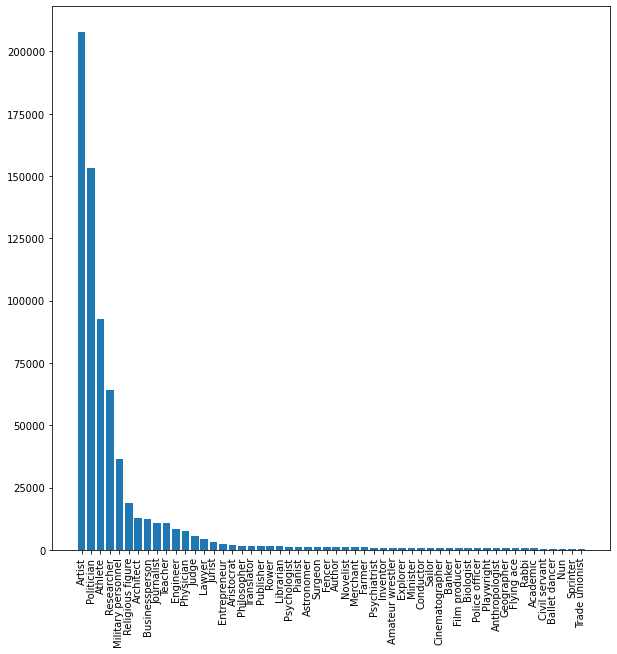

In [27]:
#plt.bar(x=len(df["Occupation"].value_counts()), height=df["Occupation"].value_counts())
plt.figure(figsize=[10,10])
plt.bar(x=app[app>500].index,height=app[app>500].values)
plt.xticks(rotation=90)
plt.show()

In [28]:
app = df.Country.value_counts()
df['Country'] = df['Country'].replace(app[app<500].index,'Others')

In [29]:
df.Country.value_counts()

United States of America    149320
Germany                      81906
France                       65518
United Kingdom               50459
Others                       27481
                             ...  
Pakistan                       574
Nigeria                        557
Byzantine Empire               553
Qing dynasty                   526
South Korea                    502
Name: Country, Length: 77, dtype: int64

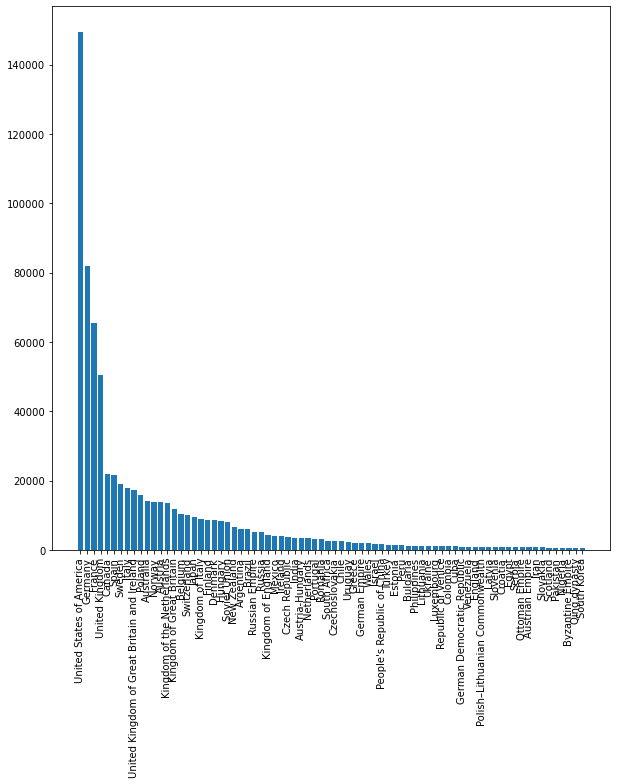

In [30]:
plt.figure(figsize=[10,10])
plt.bar(x=app[app>500].index,height=app[app>500].values)
plt.xticks(rotation=90)
plt.show()

In [31]:
df.shape

(735785, 8)

In [32]:
iqr = np.quantile(df['Age of death'],.75)-np.quantile(df['Age of death'],.25)
q1 = np.quantile(df['Age of death'],.25) - 1.5*iqr
q3 = np.quantile(df['Age of death'],.75) + 1.5*iqr
df = df[df['Age of death'] > q1]
df = df[df['Age of death'] < q3]
df.shape

(721216, 8)

In [33]:
from sklearn.preprocessing import LabelEncoder,normalize

lb_make = LabelEncoder()

In [34]:
df['Occupation'] = lb_make.fit_transform(df['Occupation'])

In [35]:
df['Gender']=  lb_make.fit_transform(df['Gender'])

In [36]:
df['Manner of death'] = lb_make.fit_transform(df['Manner of death'])
df['Country'] = lb_make.fit_transform(df['Country'])

In [37]:
df.head(10)

,Name,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,George Washington,1,73,41,1732,1799,103,67.0
1,Douglas Adams,1,71,5,1952,2001,103,49.0
2,Abraham Lincoln,1,73,41,1809,1865,77,56.0
3,Wolfgang Amadeus Mozart,1,45,5,1756,1791,16,35.0
4,Ludwig van Beethoven,1,45,5,1770,1827,16,57.0
5,Jean-François Champollion,1,45,35,1790,1832,103,42.0
6,Paul Morand,1,21,5,1888,1976,16,88.0
7,Claude Monet,1,21,5,1840,1926,103,86.0
8,Diego Velázquez,1,66,5,1599,1660,16,61.0
9,El Greco,1,66,5,1541,1614,16,73.0


In [38]:
app = df.copy()
app = app.sort_values(by='Birth year')
app.reset_index(drop=True, inplace=True)
app = app[app['Birth year']<1922]
#app.tail(20)

In [39]:
#def NormalizeData(data):
#    return (data - np.min(data)) / (np.max(data) - np.min(data))
#app['Birth year'] = NormalizeData(np.array(app['Birth year']))

In [40]:
m = app['Age of death'].rolling(2000).mean()


In [41]:
app2 = df.copy()
app2 = app2.sort_values(by='Death year')
app2.reset_index(drop=True, inplace=True)
app2 = app2[app2['Death year'] < 2002]
n = app2['Age of death'].rolling(2000).mean()


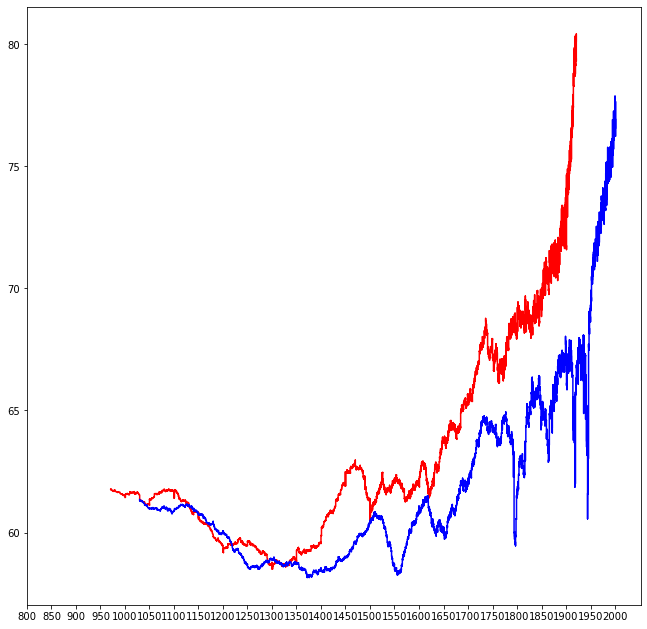

In [42]:
plt.figure(figsize=(11,11))
plt.plot(app['Birth year'],m,c='red')
plt.plot(app2['Death year'],n,c='blue')
plt.xticks(np.arange(800,max(df['Death year']),step=50))
plt.show()


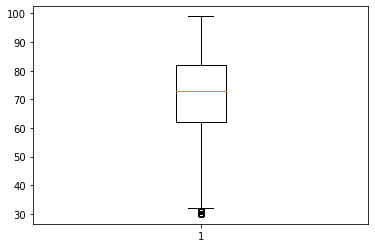

In [43]:
plt.boxplot(df['Age of death'])
plt.show()

In [44]:
app2["Gender"].value_counts()

1    506291
0     48465
2        58
Name: Gender, dtype: int64

In [45]:
app2[app2['Gender'] == 2]

,Name,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
237,Cai Lun,2,45,41,50,121,127,71.0
244,Sun Cheng,2,45,41,100,132,16,32.0
262,Hou Lan,2,45,41,101,172,36,71.0
267,Cao Jie,2,45,41,101,181,16,80.0
271,Jian Shuo,2,45,41,100,189,36,89.0
1203,Gao Lishi,2,45,5,684,762,16,78.0
2060,John the Orphanotrophos,2,8,41,1000,1043,16,43.0
2483,Tong Guan,2,45,41,1054,1126,16,72.0
2490,Li Yan,2,45,35,1050,1126,36,76.0
6328,Wang Zhen,2,45,41,1400,1449,16,49.0


In [46]:
app2.groupby(['Birth year','Occupation'])['Age of death'].mean()

Birth year  Occupation
-2284       35            84.0
-1750       35            50.0
-1648       41            99.0
-1550       35            47.0
-1481       35            56.0
                          ... 
 1970       41            30.0
            47            31.0
            54            31.0
 1971       5             30.0
            7             30.0
Name: Age of death, Length: 18204, dtype: float64

In [47]:
app2.groupby(['Birth year','Occupation'])['Age of death'].median()

Birth year  Occupation
-2284       35            84.0
-1750       35            50.0
-1648       41            99.0
-1550       35            47.0
-1481       35            56.0
                          ... 
 1970       41            30.0
            47            31.0
            54            31.0
 1971       5             30.0
            7             30.0
Name: Age of death, Length: 18204, dtype: float64

In [48]:
app2.groupby(['Birth year','Occupation'])['Age of death'].agg(pd.Series.mode)

Birth year  Occupation
-2284       35            84.0
-1750       35            50.0
-1648       41            99.0
-1550       35            47.0
-1481       35            56.0
                          ... 
 1970       41            30.0
            47            31.0
            54            31.0
 1971       5             30.0
            7             30.0
Name: Age of death, Length: 18204, dtype: object

In [62]:
from sklearn.model_selection import train_test_split

X = app['Birth year']
y = app['Age of death']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=42)

In [68]:
train_df = pd.concat((X_train,y_train),axis=1)
test_df = pd.concat((X_test,y_test),axis=1)

In [64]:
train_df

,Birth year,Age of death
113099,1812,61.0
185942,1849,52.0
424673,1904,75.0
478069,1912,96.0
496063,1915,75.0
...,...,...
110268,1810,48.0
259178,1873,89.0
365838,1895,70.0
131932,1823,91.0


In [69]:
pred = train_df.groupby('Birth year').mean().to_dict()

In [70]:
test_df['Prediction'] = [x]

KeyError: 'Prediction'